In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('./test_images/dhoni1.jpeg')
img.shape

(241, 196, 3)

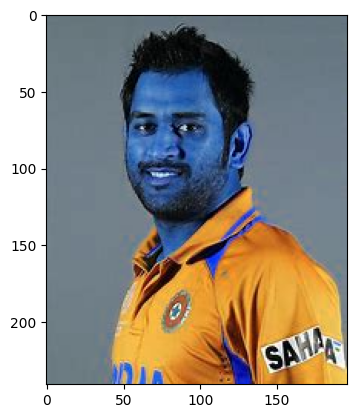

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(241, 196)

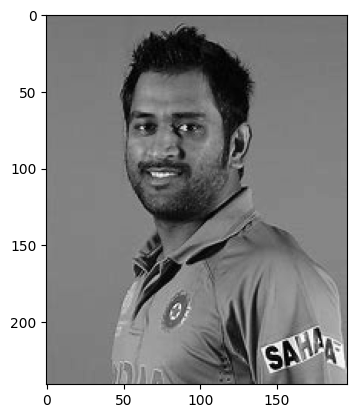

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[34, 37, 92, 92]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(34, 37, 92, 92)

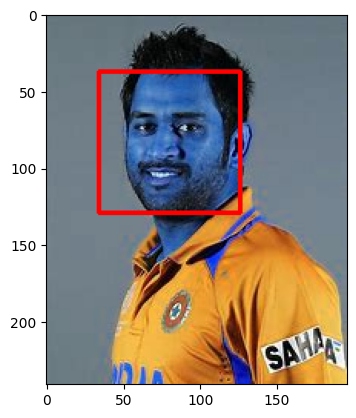

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

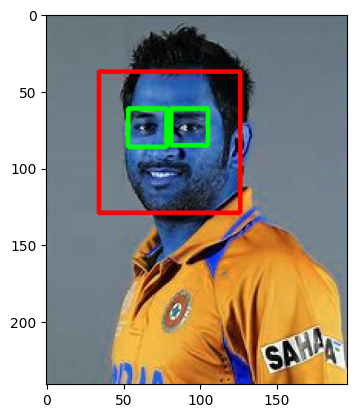

In [11]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

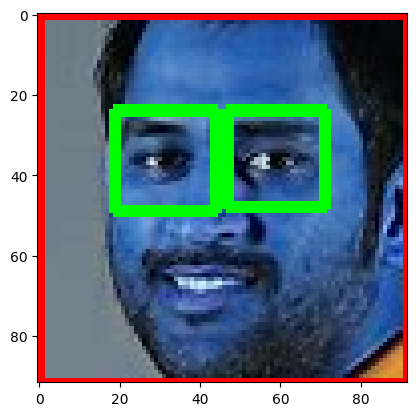

In [12]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

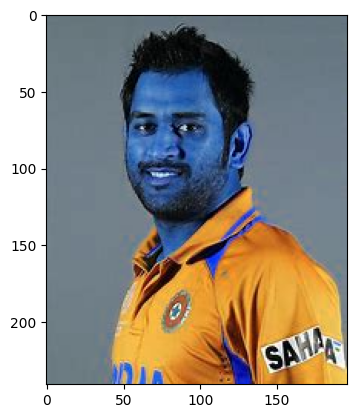

In [14]:
original_image = cv2.imread('./test_images/dhoni1.jpeg')
plt.imshow(original_image)

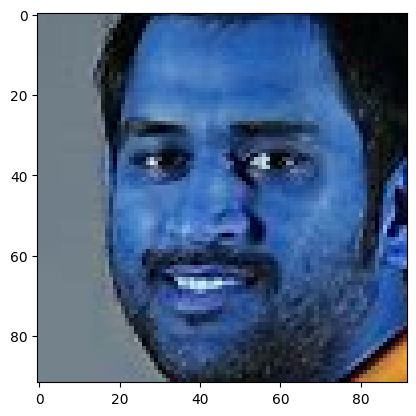

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/dhoni1.jpeg')
plt.imshow(cropped_image)
                             

In [24]:
path_to_data = './dataset/'
path_to_cr_data = "./dataset/cropped/"

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [25]:
img_dirs

['./dataset/kumar_sangakkara',
 './dataset/mahela_jayawardene',
 './dataset/ms_dhoni',
 './dataset/sanath_jayasuriya',
 './dataset/virat_kohli']

In [26]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [27]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in foler: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

kumar_sangakkara
Generating cropped images in foler:  ./dataset/cropped/kumar_sangakkara
mahela_jayawardene
Generating cropped images in foler:  ./dataset/cropped/mahela_jayawardene
ms_dhoni
Generating cropped images in foler:  ./dataset/cropped/ms_dhoni
sanath_jayasuriya
Generating cropped images in foler:  ./dataset/cropped/sanath_jayasuriya
virat_kohli
Generating cropped images in foler:  ./dataset/cropped/virat_kohli


In [33]:
import numpy as np
import pywt
import cv2

In [34]:
def w2d(img, mode='haar', level=1):
    # Convert to grayscale
    imArray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Convert to float and normalize
    imArray = np.float32(imArray) / 255.0
    
    # Compute wavelet coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process coefficients: set the approximation coefficients to zero
    coeffs_H = list(coeffs)
    coeffs_H[0] = np.zeros_like(coeffs_H[0])

    # Reconstruct the image from the modified coefficients
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H = np.uint8(imArray_H * 255)  # Convert back to uint8

    return imArray_H

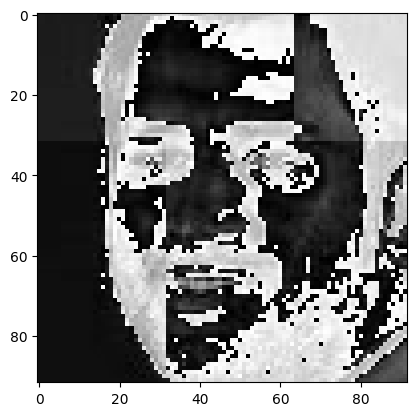

In [35]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [36]:
celebrity_file_names_dict

{'kumar_sangakkara': ['./dataset/cropped/kumar_sangakkara\\kumar_sangakkara1.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara10.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara11.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara12.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara13.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara14.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara15.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara16.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara17.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara18.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara19.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara2.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara20.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara21.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara22.png',
  './dataset/cropped/k

In [37]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'kumar_sangakkara': ['./dataset/cropped/kumar_sangakkara\\kumar_sangakkara1.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara10.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara11.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara12.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara13.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara14.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara15.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara16.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara17.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara18.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara19.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara2.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara20.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara21.png',
  './dataset/cropped/kumar_sangakkara\\kumar_sangakkara22.png',
  './dataset/cropped/k

In [38]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count+=1
class_dict

{'kumar_sangakkara': 0,
 'mahela_jayawardene': 1,
 'ms_dhoni': 2,
 'sanath_jayasuriya': 3,
 'virat_kohli': 4}

In [39]:
x = []
y = []

for celebirty_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)        
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebirty_name])

In [40]:
len(x)

159

In [41]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(159, 4096)

# Training The Model

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.675

In [45]:
len(x_test)

40

In [46]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       1.00      0.33      0.50         6
           2       0.55      0.92      0.69        13
           3       0.50      0.33      0.40         3
           4       0.90      0.82      0.86        11

    accuracy                           0.68        40
   macro avg       0.74      0.57      0.60        40
weighted avg       0.74      0.68      0.66        40



## GridSearch

In [47]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [48]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [49]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\mihir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\mihir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\mihir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\mihir\AppData\Local\Programs\Python\P

,model,best_score,best_params
0,svm,0.715580,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.556159,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.715217,{'logisticregression__C': 1}


In [50]:
best_clf = best_estimators['svm']

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 5,  0,  2,  0,  0],
       [ 2,  2,  1,  1,  0],
       [ 0,  0, 12,  1,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  2,  0,  0,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

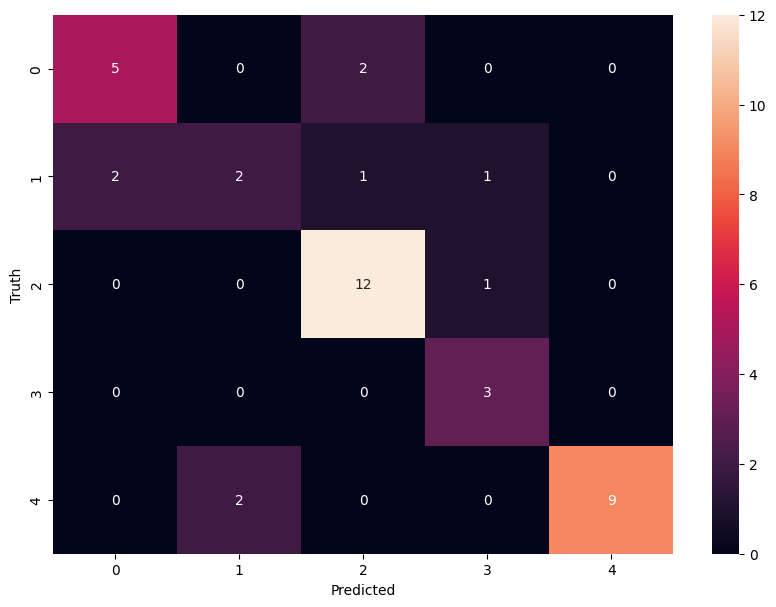

In [52]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
!pip install joblib
import joblib

In [54]:
# Save the model as a pickle file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [55]:
import json
with open("class_dictionary.json", "w") as f:
    json.dump(class_dict, f)